In [8]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import os
# from mothur_py import Mothur
from shutil import copy
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")

In [9]:
fastq_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Concatenated/20171103_FAH15473/barcode02/merged.fastq", "fastq"))

The number of reads in this file is 413127


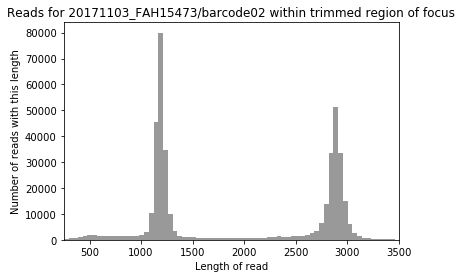

In [10]:
lengths = []
for key in fastq_dict:
    lengths.append(len(fastq_dict[key].seq))
print("The number of reads in this file is", len(fastq_dict))
ax = sns.distplot(lengths, color="k", kde=False, bins=5000)
ax.set(xlim=(250, 3500))
ax.set_title("Reads for 20171103_FAH15473/barcode02 within trimmed region of focus")
ax.set_xlabel("Length of read")
ax.set_ylabel("Number of reads with this length")
plt.show()

In [15]:
frDNA = fastq_dict.copy()
for key in fastq_dict:
    if len(fastq_dict[key].seq) not in range(2700, 3200):
        del frDNA[key]
print("The number of reads between 2000 and 4000 bp in length is", len(frDNA))
EF1a = fastq_dict.copy()
for key in fastq_dict:
    if len(fastq_dict[key].seq) not in range(900, 1400):
        del EF1a[key]
print("The number of reads between 800 and 1700 bp in length is", len(EF1a))

The number of reads between 2000 and 4000 bp in length is 167054
The number of reads between 800 and 1700 bp in length is 192712


In [19]:
# Write the reads defined between the frDNA cutoff into a new fasta file
SeqIO.write(frDNA.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_frDNA_clipped.fastq", "fastq")

167054

In [20]:
# Write the reads defined between the EF1a cutoff into a new fasta file
SeqIO.write(EF1a.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_EF1a_clipped.fastq", "fastq")

192712